# Preprocessing gambar

Histogram Ekualisasi

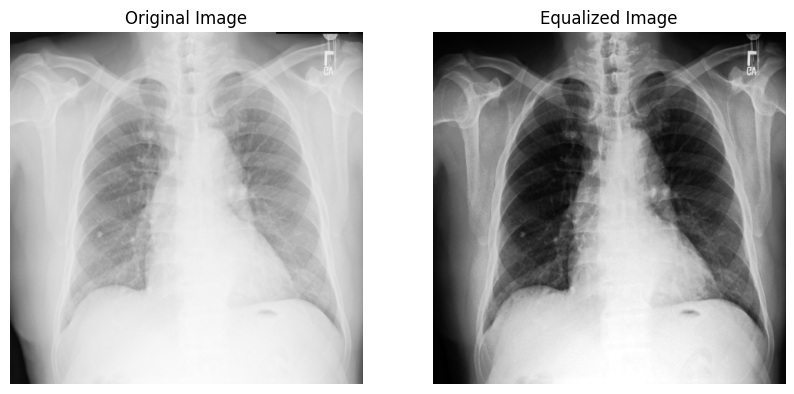

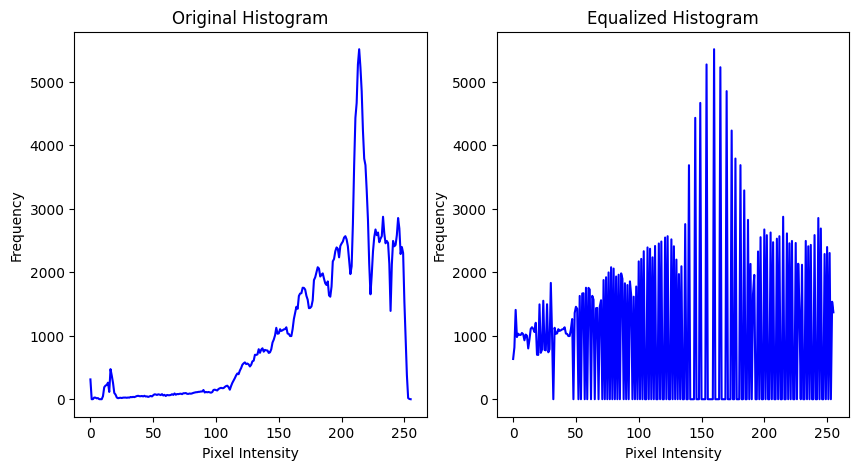

Kontras sebelum equalization histogram: 42.70728630316623
Kontras setelah equalization histogram: 74.0295870571604


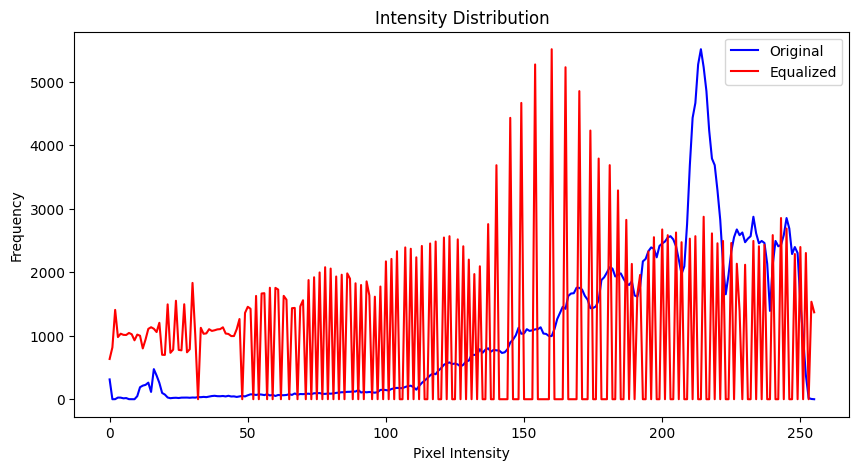

In [46]:
# Import library yang diperlukan
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk melakukan equalization histogram
def histogram_equalization(image):
    # Konversi gambar berwarna (BGR) ke grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Melakukan equalization histogram pada gambar grayscale
    equalized_image = cv2.equalizeHist(gray_image)
    
    return equalized_image

# Fungsi untuk menghitung kontras gambar
def kalkulasi_kontras(image):
    # Mengembalikan standar deviasi dari intensitas piksel gambar, yang digunakan sebagai ukuran kontras
    return image.std()

# Fungsi untuk menghitung distribusi intensitas gambar
def kalkulasi_intensity_distribusi(image):
    # Menghitung histogram intensitas piksel gambar
    histogram, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    return histogram

# Membaca gambar dari file
image = cv2.imread('testprepro-normal.png')

# Menerapkan equalization histogram pada gambar
equalized_image = histogram_equalization(image)

# Menghitung histogram gambar asli
hist_original = cv2.calcHist([image], [0], None, [256], [0,256])

# Menghitung histogram gambar yang telah diequalisasi
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0,256])

# Menampilkan gambar asli dan hasil equalization histogram
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # Membuat subplot pertama
plt.title('Original Image')  # Menambahkan judul
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Menampilkan gambar asli dalam format RGB
plt.axis('off')  # Menghilangkan axis

plt.subplot(1, 2, 2)  # Membuat subplot kedua
plt.title('Equalized Image')  # Menambahkan judul
plt.imshow(equalized_image, cmap='gray')  # Menampilkan gambar equalized dalam format grayscale
plt.axis('off')  # Menghilangkan axis

plt.show()  # Menampilkan plot

# Menampilkan histogram gambar asli dan equalized
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # Membuat subplot pertama
plt.title('Original Histogram')  # Menambahkan judul
plt.plot(hist_original, color='blue')  # Menampilkan histogram gambar asli dengan warna biru
plt.xlabel('Pixel Intensity')  # Menambahkan label sumbu x
plt.ylabel('Frequency')  # Menambahkan label sumbu y

plt.subplot(1, 2, 2)  # Membuat subplot kedua
plt.title('Equalized Histogram')  # Menambahkan judul
plt.plot(hist_equalized, color='blue')  # Menampilkan histogram gambar equalized dengan warna biru
plt.xlabel('Pixel Intensity')  # Menambahkan label sumbu x
plt.ylabel('Frequency')  # Menambahkan label sumbu y

plt.show()  # Menampilkan plot

# Menghitung kontras sebelum dan sesudah equalization histogram
kontras_asli = kalkulasi_kontras(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
kontras_equalized = kalkulasi_kontras(equalized_image)

# Menampilkan kontras sebelum dan sesudah equalization histogram
print("Kontras sebelum equalization histogram:", kontras_asli)
print("Kontras setelah equalization histogram:", kontras_equalized)

# Menghitung distribusi intensitas sebelum dan sesudah equalization histogram
distribusi_asli = kalkulasi_intensity_distribusi(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
distribusi_equalized = kalkulasi_intensity_distribusi(equalized_image)

# Menampilkan distribusi intensitas
plt.figure(figsize=(10, 5))

# Menampilkan distribusi intensitas gambar asli
plt.plot(distribusi_asli, color='blue', label='Original')

# Menampilkan distribusi intensitas gambar equalized
plt.plot(distribusi_equalized, color='red', label='Equalized')

plt.title('Intensity Distribution')  # Menambahkan judul
plt.xlabel('Pixel Intensity')  # Menambahkan label sumbu x
plt.ylabel('Frequency')  # Menambahkan label sumbu y
plt.legend()  # Menambahkan legenda untuk membedakan antara original dan equalized

plt.show()  # Menampilkan plot


Gamma Correction

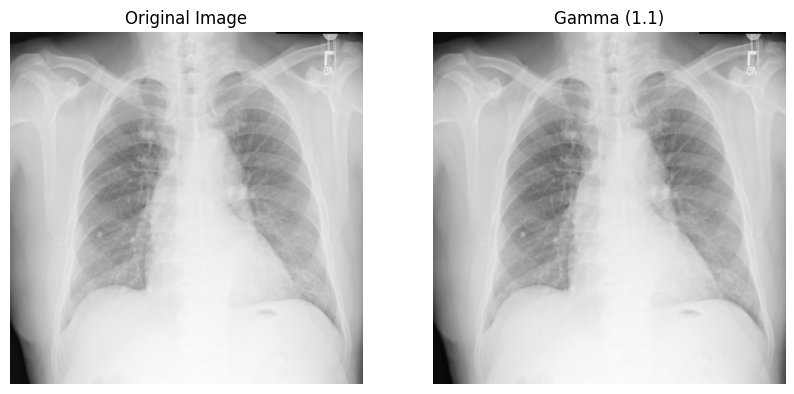

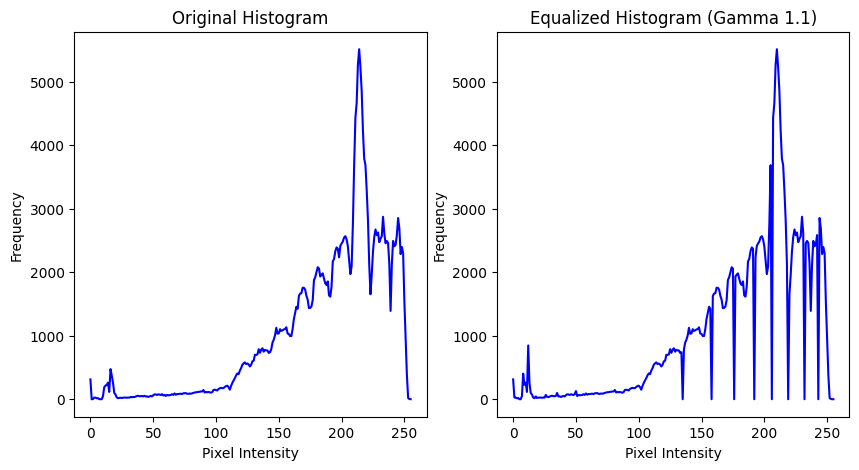

Kontras sebelum koreksi gamma: 42.70728630316623
Kontras setelah koreksi gamma: 44.5890011835097


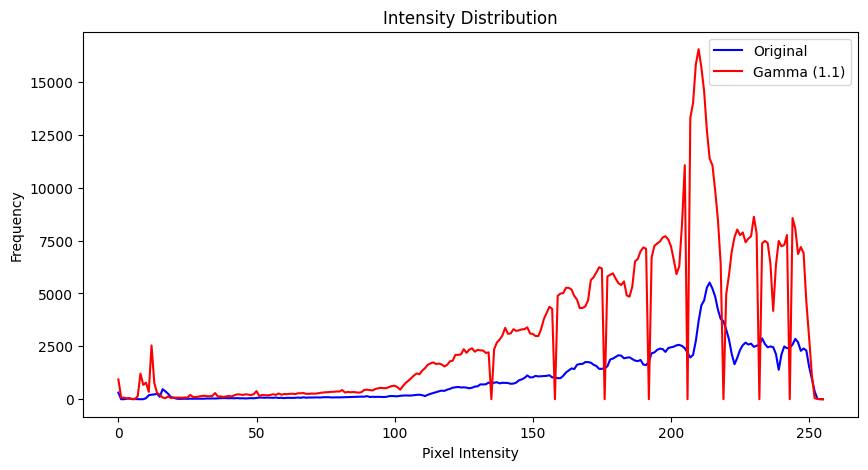

In [47]:
# Import library yang diperlukan
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk menghitung kontras
def kalkulasi_kontras(image):
    # Mengembalikan standar deviasi dari intensitas piksel gambar, yang digunakan sebagai ukuran kontras
    return image.std()

# Fungsi untuk menghitung distribusi intensitas
def kalkulasi_intensity_distribusi(image):
    # Menghitung histogram intensitas piksel gambar
    histogram, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    return histogram

# Fungsi untuk koreksi gamma
def gamma_correction(image, gamma):
    # Terapkan koreksi gamma dengan membagi intensitas piksel dengan 255, menerapkan operasi gamma, dan mengalikannya kembali dengan 255
    adjusted_image = np.power(image / 255.0, gamma) * 255.0
    return np.uint8(adjusted_image)

# Baca gambar
image = cv2.imread('testprepro-normal.png')

# Terapkan koreksi gamma dengan nilai gamma 1.1
gamma = 1.1
equalized_image = gamma_correction(image, gamma)

# Hitung histogram gambar asli
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])

# Hitung histogram gambar yang telah dikoreksi gamma
hist_equalized = cv2.calcHist([equalized_image], [0], None, [256], [0, 256])

# Tampilkan gambar asli dan hasil koreksi gamma
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # Membuat subplot pertama
plt.title('Original Image')  # Menambahkan judul
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Menampilkan gambar asli dalam format RGB
plt.axis('off')  # Menghilangkan axis

plt.subplot(1, 2, 2)  # Membuat subplot kedua
plt.title('Gamma (1.1)')  # Menambahkan judul
plt.imshow(equalized_image, cmap='gray')  # Menampilkan gambar hasil koreksi gamma dalam format grayscale
plt.axis('off')  # Menghilangkan axis

plt.show()  # Menampilkan plot

# Tampilkan histogram gambar asli dan hasil koreksi gamma
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # Membuat subplot pertama
plt.title('Original Histogram')  # Menambahkan judul
plt.plot(hist_original, color='blue')  # Menampilkan histogram gambar asli dengan warna biru
plt.xlabel('Pixel Intensity')  # Menambahkan label sumbu x
plt.ylabel('Frequency')  # Menambahkan label sumbu y

plt.subplot(1, 2, 2)  # Membuat subplot kedua
plt.title('Equalized Histogram (Gamma 1.1)')  # Menambahkan judul
plt.plot(hist_equalized, color='blue')  # Menampilkan histogram gambar hasil koreksi gamma dengan warna biru
plt.xlabel('Pixel Intensity')  # Menambahkan label sumbu x
plt.ylabel('Frequency')  # Menambahkan label sumbu y

plt.show()  # Menampilkan plot

# Perhitungan kontras sebelum dan sesudah koreksi gamma
kontras_asli = kalkulasi_kontras(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
kontras_equalized = kalkulasi_kontras(equalized_image)

# Menampilkan kontras sebelum dan sesudah koreksi gamma
print("Kontras sebelum koreksi gamma:", kontras_asli)
print("Kontras setelah koreksi gamma:", kontras_equalized)

# Distribusi intensitas sebelum dan sesudah koreksi gamma
distribusi_asli = kalkulasi_intensity_distribusi(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
distribusi_equalized = kalkulasi_intensity_distribusi(equalized_image)

# Plot distribusi intensitas
plt.figure(figsize=(10, 5))

# Menampilkan distribusi intensitas gambar asli
plt.plot(distribusi_asli, color='blue', label='Original')

# Menampilkan distribusi intensitas gambar hasil koreksi gamma
plt.plot(distribusi_equalized, color='red', label='Gamma (1.1)')

plt.title('Intensity Distribution')  # Menambahkan judul
plt.xlabel('Pixel Intensity')  # Menambahkan label sumbu x
plt.ylabel('Frequency')  # Menambahkan label sumbu y
plt.legend()  # Menambahkan legenda untuk membedakan antara original dan hasil koreksi gamma

plt.show()  # Menampilkan plot


Sharpening (penajaman)

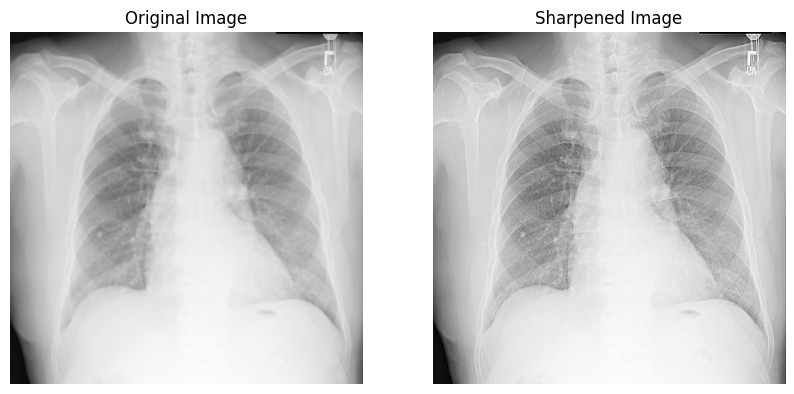

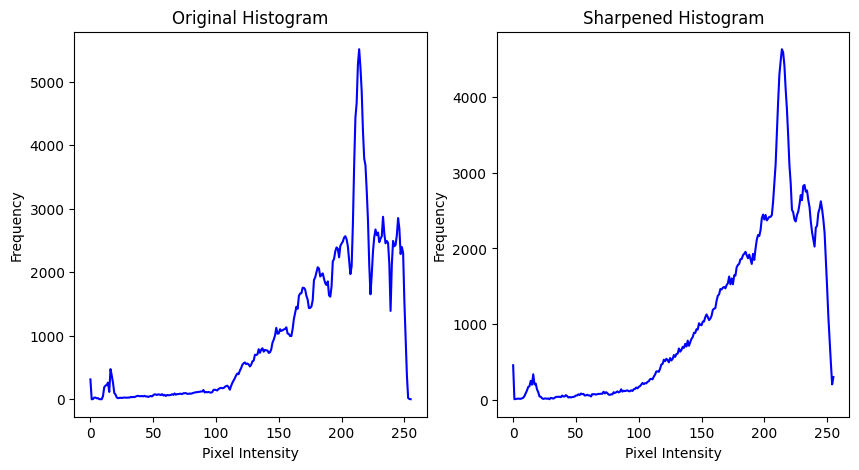

Kontras sebelum sharpening: 42.70728630316623
Kontras setelah sharpening: 43.28519166535115


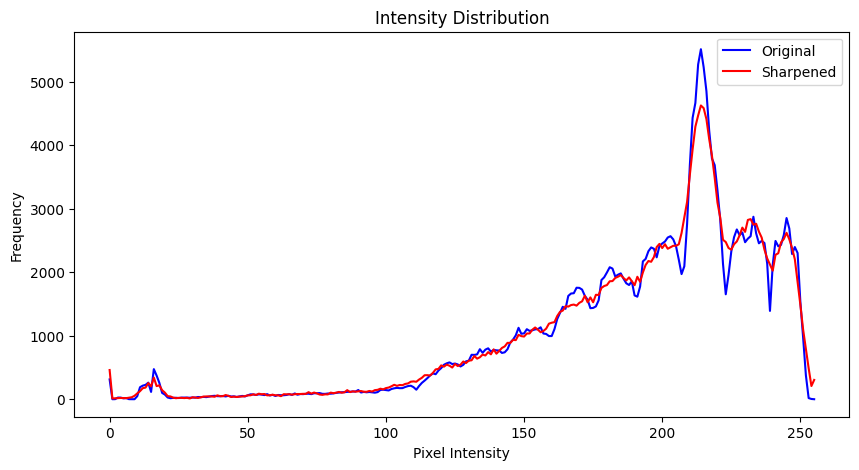

In [48]:
# Import library yang diperlukan
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Fungsi untuk menghitung kontras
def kalkulasi_kontras(image):
    # Mengembalikan standar deviasi dari intensitas piksel gambar, yang digunakan sebagai ukuran kontras
    return image.std()

# Fungsi untuk menghitung distribusi intensitas
def kalkulasi_intensity_distribusi(image):
    # Menghitung histogram intensitas piksel gambar
    histogram, _ = np.histogram(image.flatten(), bins=256, range=[0, 256])
    return histogram

# Fungsi untuk filter sharpening
def sharpening_filter(image):
    # Definisikan kernel untuk sharpening
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]])
    
    # Terapkan filter sharpening menggunakan kernel
    sharpened_image = cv2.filter2D(image, -1, kernel)
    
    return sharpened_image

# Baca gambar dari file
image = cv2.imread('testprepro-normal.png')

# Terapkan filter sharpening pada gambar
sharpened_image = sharpening_filter(image)

# Hitung histogram gambar asli
hist_original = cv2.calcHist([image], [0], None, [256], [0, 256])

# Hitung histogram gambar yang telah di-sharpen
hist_sharpened = cv2.calcHist([sharpened_image], [0], None, [256], [0, 256])

# Tampilkan gambar asli dan hasil sharpening
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # Membuat subplot pertama
plt.title('Original Image')  # Menambahkan judul
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Menampilkan gambar asli dalam format RGB
plt.axis('off')  # Menghilangkan axis

plt.subplot(1, 2, 2)  # Membuat subplot kedua
plt.title('Sharpened Image')  # Menambahkan judul
plt.imshow(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2RGB))  # Menampilkan gambar hasil sharpening dalam format RGB
plt.axis('off')  # Menghilangkan axis

plt.show()  # Menampilkan plot

# Tampilkan histogram gambar asli dan hasil sharpening
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # Membuat subplot pertama
plt.title('Original Histogram')  # Menambahkan judul
plt.plot(hist_original, color='blue')  # Menampilkan histogram gambar asli dengan warna biru
plt.xlabel('Pixel Intensity')  # Menambahkan label sumbu x
plt.ylabel('Frequency')  # Menambahkan label sumbu y

plt.subplot(1, 2, 2)  # Membuat subplot kedua
plt.title('Sharpened Histogram')  # Menambahkan judul
plt.plot(hist_sharpened, color='blue')  # Menampilkan histogram gambar hasil sharpening dengan warna biru
plt.xlabel('Pixel Intensity')  # Menambahkan label sumbu x
plt.ylabel('Frequency')  # Menambahkan label sumbu y

plt.show()  # Menampilkan plot

# Perhitungan kontras sebelum dan sesudah sharpening
kontras_asli = kalkulasi_kontras(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
kontras_sharpened = kalkulasi_kontras(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2GRAY))

# Menampilkan kontras sebelum dan sesudah sharpening
print("Kontras sebelum sharpening:", kontras_asli)
print("Kontras setelah sharpening:", kontras_sharpened)

# Distribusi intensitas sebelum dan sesudah sharpening
distribusi_asli = kalkulasi_intensity_distribusi(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY))
distribusi_sharpened = kalkulasi_intensity_distribusi(cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2GRAY))

# Plot distribusi intensitas
plt.figure(figsize=(10, 5))

# Menampilkan distribusi intensitas gambar asli
plt.plot(distribusi_asli, color='blue', label='Original')

# Menampilkan distribusi intensitas gambar hasil sharpening
plt.plot(distribusi_sharpened, color='red', label='Sharpened')

plt.title('Intensity Distribution')  # Menambahkan judul
plt.xlabel('Pixel Intensity')  # Menambahkan label sumbu x
plt.ylabel('Frequency')  # Menambahkan label sumbu y
plt.legend()  # Menambahkan legenda untuk membedakan antara original dan hasil sharpening

plt.show()  # Menampilkan plot


Menggabungkan Metode Preprocessing 

In [33]:
# Import library yang diperlukan
import cv2
import os
import numpy as np

# Fungsi untuk equalisasi histogram
def histogram_equalization(image):
    # Konversi gambar ke ruang warna grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Equalisasi histogram pada gambar grayscale
    equalized_image = cv2.equalizeHist(gray_image)
    
    return equalized_image

# Fungsi untuk koreksi gamma
def gamma_correction(image, gamma):
    # Terapkan koreksi gamma pada gambar
    adjusted_image = np.power(image / 255.0, gamma) * 255.0
    return np.uint8(adjusted_image)

# Fungsi utama untuk memproses gambar dalam folder
def main():
    # Path ke folder input dan output gambar
    input_folder = 'C:/Users/Daffa fazly r/OneDrive/Documents/S4/pcd/projek/Tuberculosis'
    output_folder = 'C:/Users/Daffa fazly r/OneDrive/Documents/S4/pcd/projek/preproses_gambar_tb'
    
    # Membaca semua nama file dalam folder input
    image_files = os.listdir(input_folder)
    
    # Loop melalui setiap file gambar dalam folder
    for image_file in image_files:
        # Path lengkap ke file gambar
        image_path = os.path.join(input_folder, image_file)
        
        # Baca gambar dari file
        image = cv2.imread(image_path)
        
        # Cek apakah gambar berhasil dibaca
        if image is None:
            print(f"Error reading {image_file}, skipping.")
            continue
        
        # Terapkan histogram equalization pada gambar
        equalized_image = histogram_equalization(image)
        
        # Terapkan gamma correction pada gambar hasil histogram equalization
        gamma = 0.89  # Contoh nilai gamma
        gamma_corrected_image = gamma_correction(equalized_image, gamma)
        
        # Simpan gambar hasil ke folder output
        output_path = os.path.join(output_folder, 'gamma_equalized_' + image_file)
        cv2.imwrite(output_path, gamma_corrected_image)
        
        print(f"Gamma corrected and equalized {image_file} saved as {output_path}")

# Jalankan fungsi utama jika script ini dieksekusi sebagai program utama
if __name__ == "__main__":
    main()


Sharpened and gamma corrected Tuberculosis-1.png saved as C:/Users/Daffa fazly r/OneDrive/Documents/S4/pcd/projek/preproses_gambar_tb\sharpened_gamma_equalized_Tuberculosis-1.png
Sharpened and gamma corrected Tuberculosis-10.png saved as C:/Users/Daffa fazly r/OneDrive/Documents/S4/pcd/projek/preproses_gambar_tb\sharpened_gamma_equalized_Tuberculosis-10.png
Sharpened and gamma corrected Tuberculosis-100.png saved as C:/Users/Daffa fazly r/OneDrive/Documents/S4/pcd/projek/preproses_gambar_tb\sharpened_gamma_equalized_Tuberculosis-100.png
Sharpened and gamma corrected Tuberculosis-101.png saved as C:/Users/Daffa fazly r/OneDrive/Documents/S4/pcd/projek/preproses_gambar_tb\sharpened_gamma_equalized_Tuberculosis-101.png
Sharpened and gamma corrected Tuberculosis-102.png saved as C:/Users/Daffa fazly r/OneDrive/Documents/S4/pcd/projek/preproses_gambar_tb\sharpened_gamma_equalized_Tuberculosis-102.png
Sharpened and gamma corrected Tuberculosis-103.png saved as C:/Users/Daffa fazly r/OneDrive

Visualisasi Hasil Preprocessing

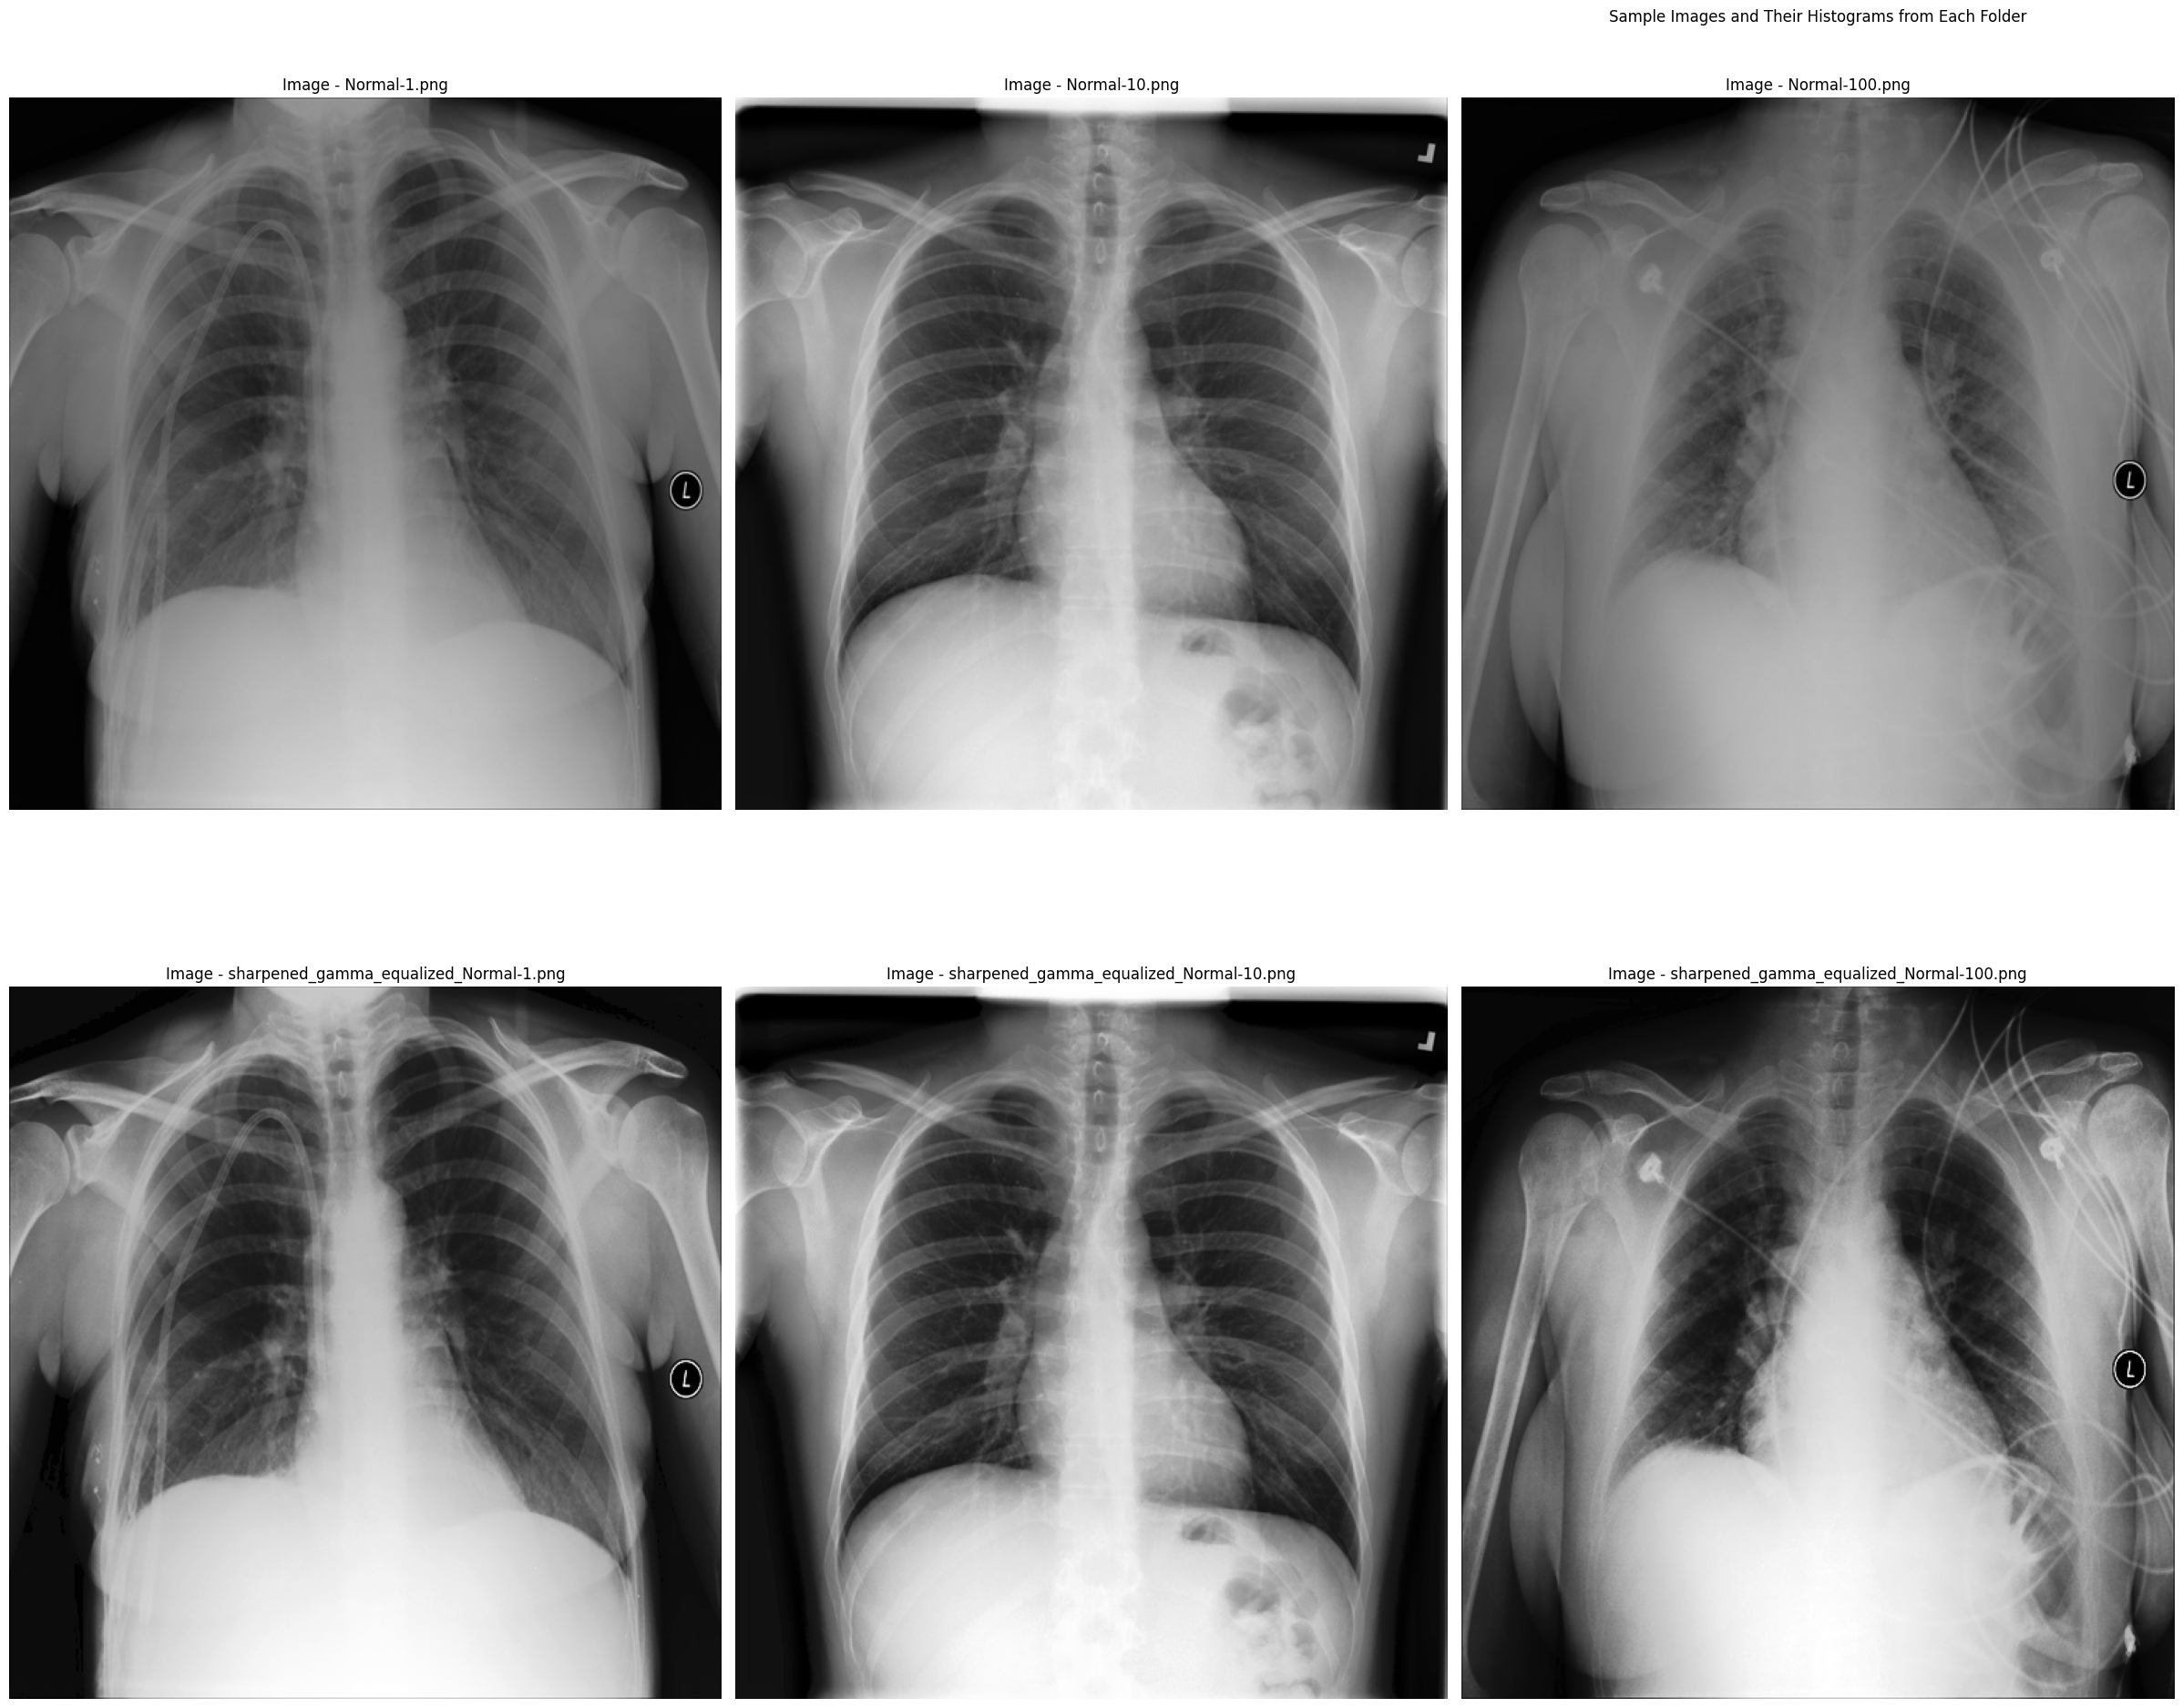

In [14]:
# Import library yang diperlukan
import os
import matplotlib.pyplot as plt
import cv2

# Atur ukuran figure untuk menampilkan gambar
plt.figure(figsize=(40, 20))

# Tentukan folder yang akan digunakan
folders = [
    r'C:/Users/Daffa fazly r/OneDrive/Documents/S4/pcd/projek/normal',
    r'C:/Users/Daffa fazly r/OneDrive/Documents/S4/pcd/projek/preproses_gambar_normal'
]

# Iterasi melalui setiap folder dan menampilkan 3 gambar pertama dari masing-masing folder
for j, folder in enumerate(folders):
    files = os.listdir(folder)
    for i, file in enumerate(files[:3]):  # Mengambil 3 file pertama
        image_path = os.path.join(folder, file)
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi dari BGR ke RGB
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Konversi ke grayscale

        # Plot gambar
        ax = plt.subplot(2, 5, j * 5 + i + 1)  # Membuat subplot
        ax.title.set_text(f"Image - {file}")
        plt.imshow(img_rgb)
        plt.axis('off')  # Sembunyikan sumbu

# Menampilkan judul utama dan menyesuaikan layout
plt.suptitle("Sample Images from Each Folder")
plt.tight_layout()
plt.show()


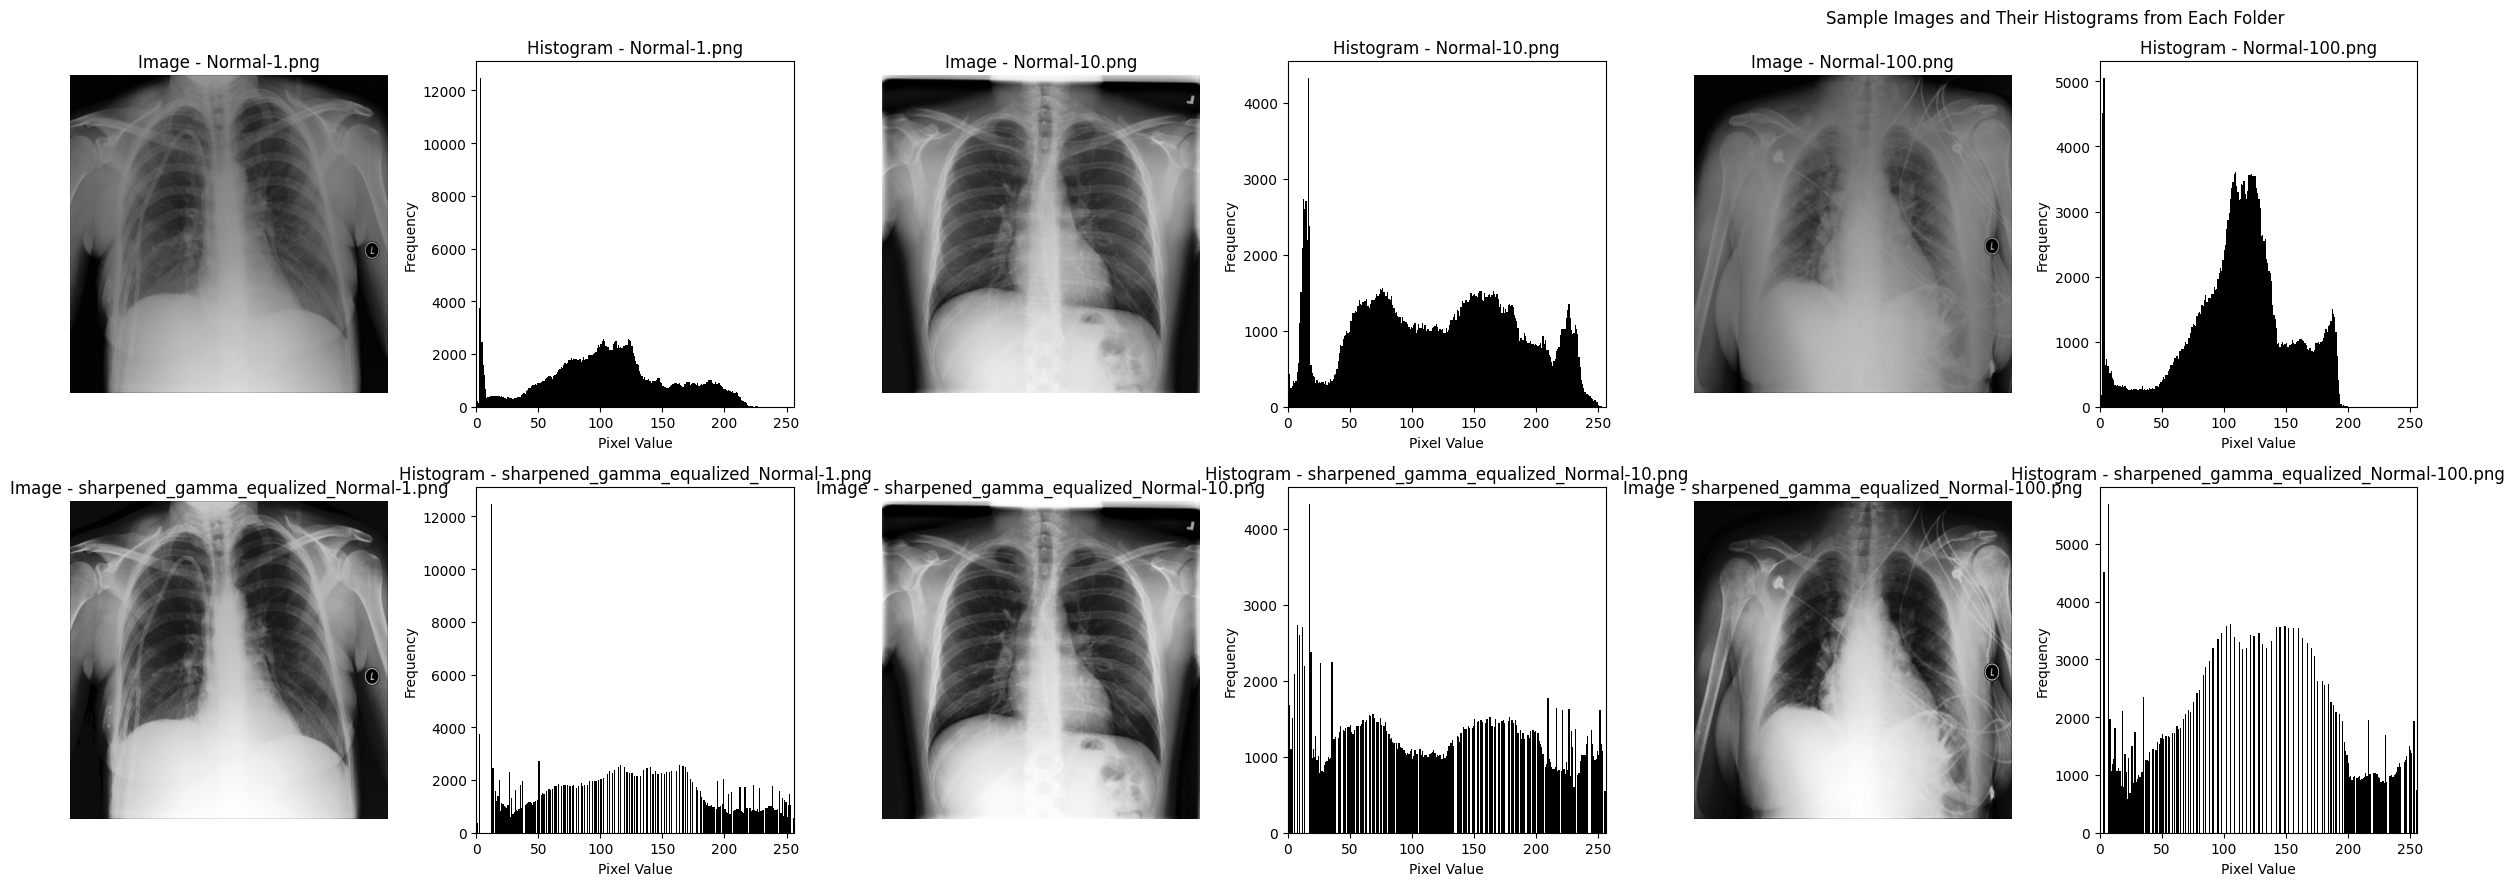

In [15]:
# Import library yang diperlukan
import os
import matplotlib.pyplot as plt
import cv2

# Atur ukuran figure untuk menampilkan gambar
plt.figure(figsize=(40, 9))

# Tentukan folder yang akan digunakan
folders = [
    r'C:/Users/Daffa fazly r/OneDrive/Documents/S4/pcd/projek/normal',
    r'C:/Users/Daffa fazly r/OneDrive/Documents/S4/pcd/projek/preproses_gambar_normal'
]

# Iterasi melalui setiap folder dan menampilkan 3 gambar pertama dari masing-masing folder
for j, folder in enumerate(folders):
    files = os.listdir(folder)
    for i, file in enumerate(files[:3]):  # Mengambil 3 file pertama
        image_path = os.path.join(folder, file)
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi dari BGR ke RGB
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Konversi ke grayscale

        # Plot gambar
        ax = plt.subplot(2, 10, j * 10 + i * 2 + 1)  # Membuat subplot untuk gambar
        ax.title.set_text(f"Image - {file}")
        plt.imshow(img_rgb)
        plt.axis('off')  # Sembunyikan sumbu

        # Plot histogram
        ax = plt.subplot(2, 10, j * 10 + i * 2 + 2)  # Membuat subplot untuk histogram
        ax.title.set_text(f"Histogram - {file}")
        plt.hist(gray_img.ravel(), bins=256, range=[0, 256], color='black')
        plt.xlim([0, 256])
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')

# Menampilkan judul utama dan menyesuaikan layout
plt.suptitle("Sample Images and Their Histograms from Each Folder")
plt.tight_layout()
plt.show()


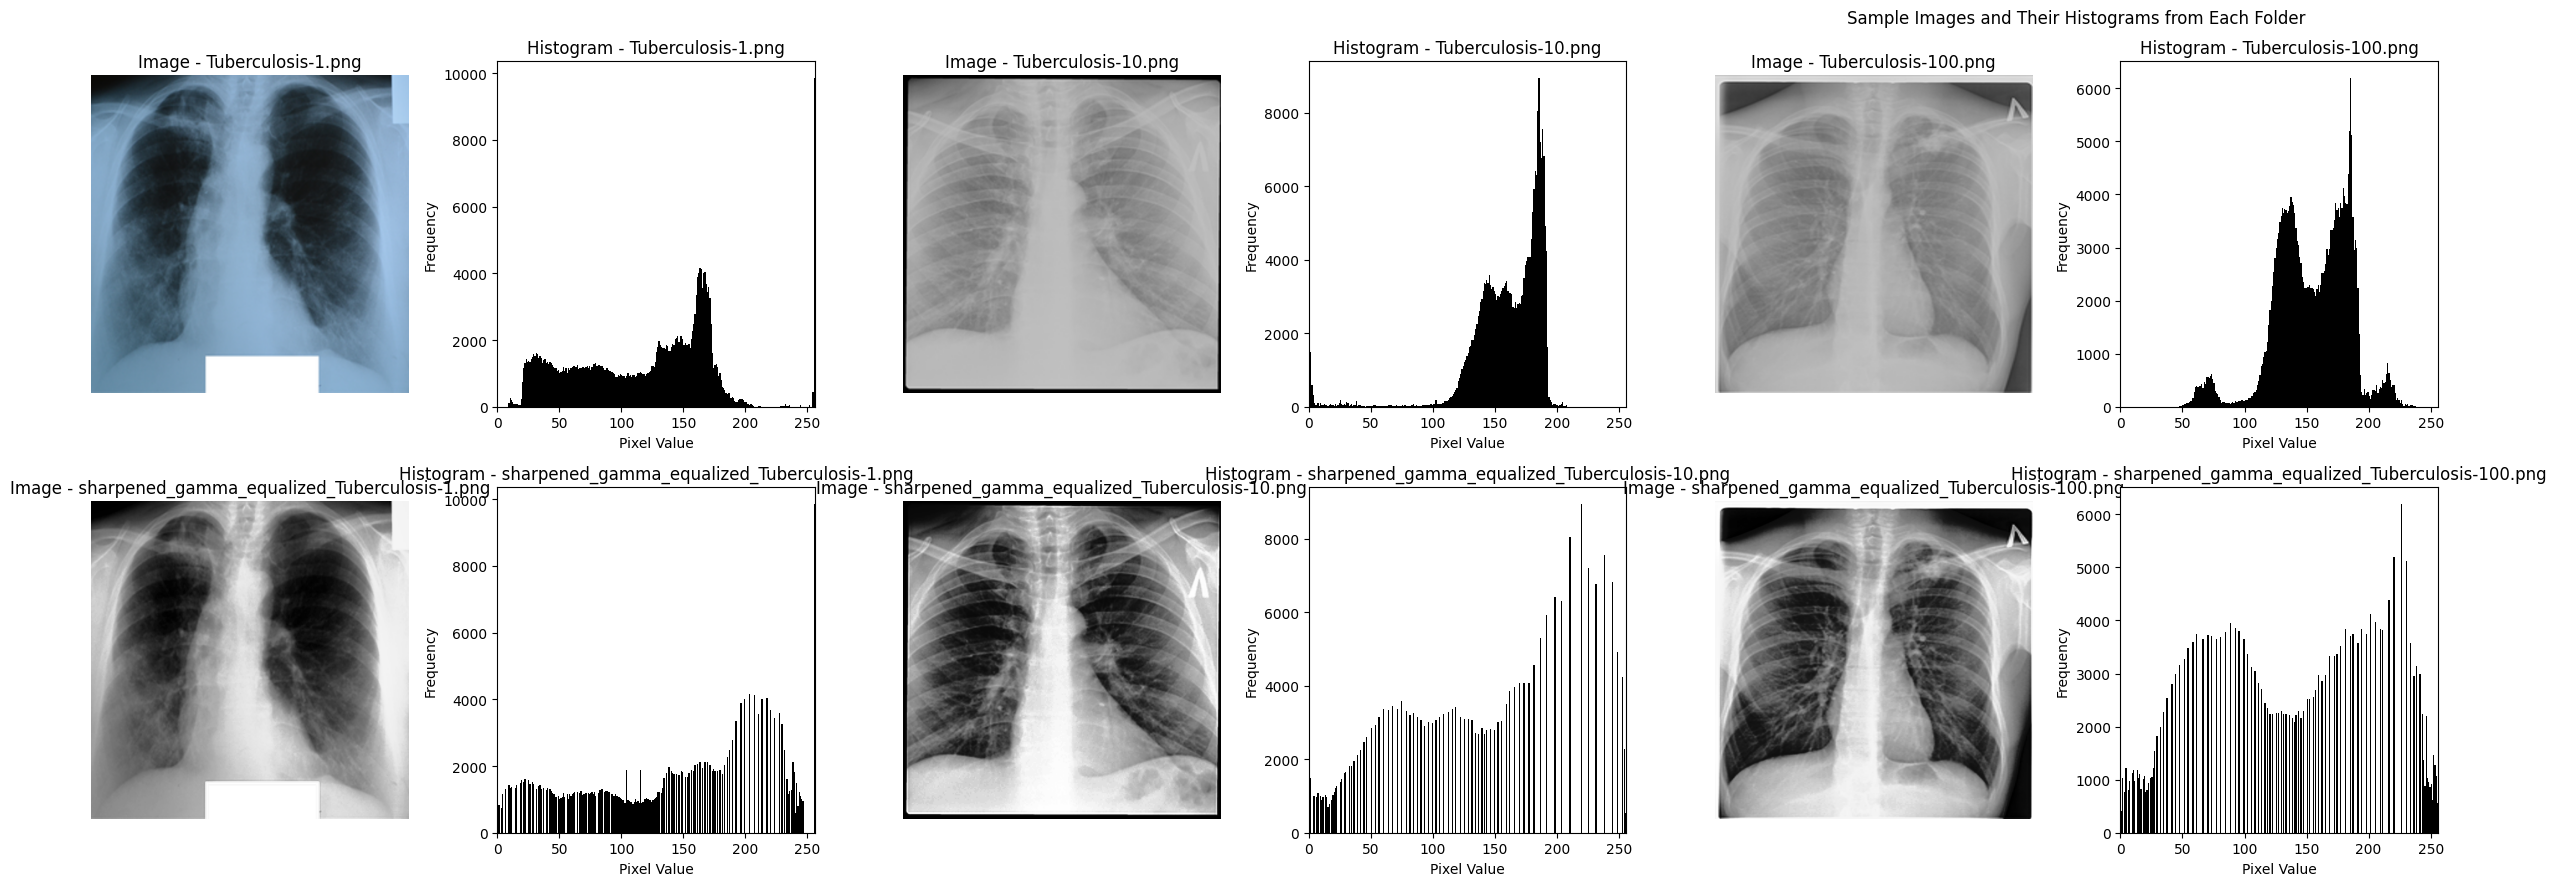

In [34]:
# Import library yang diperlukan
import os
import matplotlib.pyplot as plt
import cv2

# Atur ukuran figure untuk menampilkan gambar
plt.figure(figsize=(40, 9))

# Tentukan folder yang akan digunakan
folders = [
    r'C:/Users/Daffa fazly r/OneDrive/Documents/S4/pcd/projek/Tuberculosis',
    r'C:/Users/Daffa fazly r/OneDrive/Documents/S4/pcd/projek/preproses_gambar_tb'
]

# Iterasi melalui setiap folder dan menampilkan 3 gambar pertama dari masing-masing folder
for j, folder in enumerate(folders):
    files = os.listdir(folder)
    for i, file in enumerate(files[:3]):  # Mengambil 3 file pertama
        image_path = os.path.join(folder, file)
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Konversi dari BGR ke RGB
        gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Konversi ke grayscale

        # Plot gambar
        ax = plt.subplot(2, 10, j * 10 + i * 2 + 1)  # Membuat subplot untuk gambar
        ax.title.set_text(f"Image - {file}")
        plt.imshow(img_rgb)
        plt.axis('off')  # Sembunyikan sumbu

        # Plot histogram
        ax = plt.subplot(2, 10, j * 10 + i * 2 + 2)  # Membuat subplot untuk histogram
        ax.title.set_text(f"Histogram - {file}")
        plt.hist(gray_img.ravel(), bins=256, range=[0, 256], color='black')
        plt.xlim([0, 256])
        plt.xlabel('Pixel Value')
        plt.ylabel('Frequency')

# Menampilkan judul utama dan menyesuaikan layout
plt.suptitle("Sample Images and Their Histograms from Each Folder")
plt.tight_layout()
plt.show()


# Build

In [17]:
import numpy  as np
import pandas as pd
from skimage.transform import resize
from skimage.io import imread
import matplotlib.pyplot as plt
import os

Inisialisasi Flatten dan Target

In [35]:
# Definisikan daftar kategori gambar
Categories = ["preproses_gambar_normal", "preproses_gambar_tb"]

# Inisialisasi daftar kosong untuk menyimpan data gambar yang sudah di-flatten
flat_data_arr = []

# Inisialisasi daftar kosong untuk menyimpan label/target dari data gambar
target_arr = []


Load File Gambar

In [36]:
datadir = "C:/Users/Daffa fazly r/OneDrive/Documents/S4/pcd/projek"

In [37]:
import os
from skimage.io import imread
from skimage.transform import resize

# Loop melalui setiap kategori dalam daftar Categories
for category in Categories:
    print(f"Loading category: {category}")
    
    # Gabungkan jalur direktori data dengan nama kategori
    path = os.path.join(datadir, category)
    
    # Loop melalui setiap gambar dalam direktori kategori
    for img in os.listdir(path):
        # Baca gambar menggunakan skimage.io.imread
        img_array = imread(os.path.join(path, img))
        
        # Ubah ukuran gambar menjadi 150x150 piksel dengan 3 channel warna (RGB)
        img_resized = resize(img_array, (150, 150, 3))
        
        # Flatten gambar yang telah diubah ukurannya dan tambahkan ke flat_data_arr
        flat_data_arr.append(img_resized.flatten())
        
        # Tambahkan indeks kategori sebagai label ke target_arr
        target_arr.append(Categories.index(category))
    
    # Cetak pesan setelah selesai memuat kategori
    print(f"Loaded category: {category}")


Loading category: preproses_gambar_normal
Loaded category: preproses_gambar_normal
Loading category: preproses_gambar_tb
Loaded category: preproses_gambar_tb


Mengkonversi Data Gambar Menjadi Array

In [38]:
# Konversi daftar data gambar yang telah di-flatten menjadi array numpy
flat_data = np.array(flat_data_arr)

# Konversi daftar label/target menjadi array numpy
target = np.array(target_arr)

Membuat DataFrame dari data gambar yang telah diubah menjadi array 

In [39]:
# Buat DataFrame dari data gambar yang telah di-flatten (flat_data)
df = pd.DataFrame(flat_data)

# Tambahkan kolom "Target" ke DataFrame, yang berisi label/target untuk setiap gambar
df["Target"] = target

In [40]:
df.head()

0         1         2         3         4         5         6  \
0  0.043254  0.043254  0.043254  0.047327  0.047327  0.047327  0.047059   
1  0.969315  0.969315  0.969315  0.933949  0.933949  0.933949  0.897341   
2  0.007604  0.007604  0.007604  0.011378  0.011378  0.011378  0.011836   
3  0.999642  0.999642  0.999642  0.998294  0.998294  0.998294  0.995814   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          7         8         9  ...     67491     67492     67493     67494  \
0  0.047059  0.047059  0.047059  ...  0.065072  0.065072  0.065072  0.065103   
1  0.897341  0.897341  0.870849  ...  0.031008  0.031008  0.031008  0.089056   
2  0.011836  0.011836  0.011836  ...  0.046618  0.046618  0.046618  0.061719   
3  0.995814  0.995814  0.993645  ...  0.062592  0.062592  0.062592  0.105573   
4  0.000000  0.000000  0.000000  ...  0.705379  0.705379  0.705379  0.884770   

      67495     67496     67497     67498     67499  Target  
0  0.065103  0.065103  0.064841  0.064841  0.064841       0  
1  0.089056  0.089056  0.331749  0.331749  0.331749       0  
2  0.061719  0.061719  0.062760  0.062760  0.062760       0  
3  0.105573  0.105573  0.163265  0.163265  0.163265       0  
4  0.884770  0.884770  0.959035  0.959035  0.959035       0  

[5 rows x 67501 columns]

Inisialisasi X dan y

In [41]:
# X berisi fitur-fitur (kolom-kolom) dari DataFrame df kecuali kolom 'Target'
X = df.drop('Target', axis=1)

# y berisi hanya kolom 'Target'
y = df[['Target']]


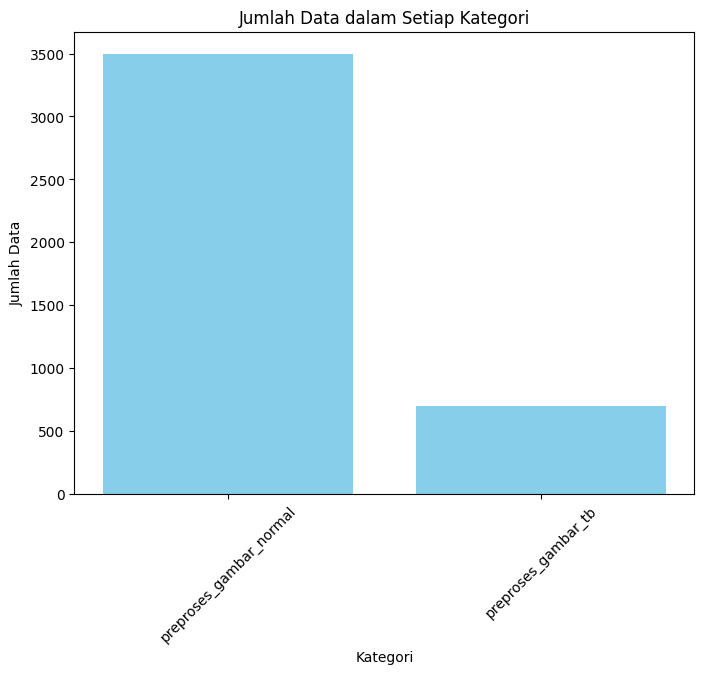

In [25]:
category_counts = df['Target'].value_counts()

# Plot visualisasi jumlah data
plt.figure(figsize=(8, 6))
plt.bar(Categories, category_counts, color='skyblue')
plt.title('Jumlah Data dalam Setiap Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah Data')
plt.xticks(rotation=45)
plt.show()

In [26]:
X.head()

0         1         2         3         4         5         6      \
0  0.043254  0.043254  0.043254  0.047327  0.047327  0.047327  0.047059   
1  0.969315  0.969315  0.969315  0.933949  0.933949  0.933949  0.897341   
2  0.007604  0.007604  0.007604  0.011378  0.011378  0.011378  0.011836   
3  0.999642  0.999642  0.999642  0.998294  0.998294  0.998294  0.995814   
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

      7         8         9      ...     67490     67491     67492     67493  \
0  0.047059  0.047059  0.047059  ...  0.065071  0.065072  0.065072  0.065072   
1  0.897341  0.897341  0.870849  ...  0.027455  0.031008  0.031008  0.031008   
2  0.011836  0.011836  0.011836  ...  0.045454  0.046618  0.046618  0.046618   
3  0.995814  0.995814  0.993645  ...  0.054914  0.062592  0.062592  0.062592   
4  0.000000  0.000000  0.000000  ...  0.566504  0.705379  0.705379  0.705379   

      67494     67495     67496     67497     67498     67499  
0  0.065103  0.065103  0.065103  0.064841  0.064841  0.064841  
1  0.089056  0.089056  0.089056  0.331749  0.331749  0.331749  
2  0.061719  0.061719  0.061719  0.062760  0.062760  0.062760  
3  0.105573  0.105573  0.105573  0.163265  0.163265  0.163265  
4  0.884770  0.884770  0.884770  0.959035  0.959035  0.959035  

[5 rows x 67500 columns]

In [27]:
y.head()

Target
0       0
1       0
2       0
3       0
4       0

# Spliting data

In [28]:
from sklearn import svm

from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


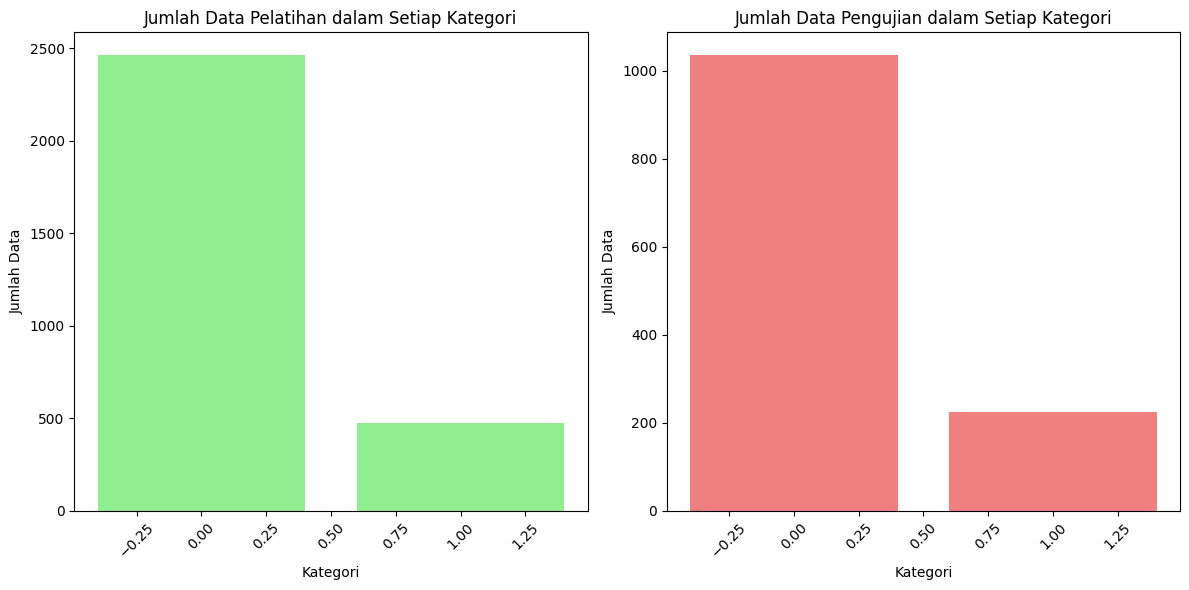

In [30]:
# Menghitung jumlah data dalam setiap kategori setelah pemotongan
train_category_counts = y_train['Target'].value_counts()
test_category_counts = y_test['Target'].value_counts()

# Mendapatkan kategori unik dari target
Categories = y_train['Target'].unique()

# Plot visualisasi jumlah data untuk set data pelatihan dan pengujian
if not train_category_counts.empty and not test_category_counts.empty:
    plt.figure(figsize=(12, 6))
    
    # Plot untuk set data pelatihan
    plt.subplot(1, 2, 1)
    plt.bar(Categories, train_category_counts, color='lightgreen')
    plt.title('Jumlah Data Pelatihan dalam Setiap Kategori')
    plt.xlabel('Kategori')
    plt.ylabel('Jumlah Data')
    plt.xticks(rotation=45)

    # Plot untuk set data pengujian
    plt.subplot(1, 2, 2)
    plt.bar(Categories, test_category_counts, color='lightcoral')
    plt.title('Jumlah Data Pengujian dalam Setiap Kategori')
    plt.xlabel('Kategori')
    plt.ylabel('Jumlah Data')
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada data untuk plotting.")


In [31]:
# Check the shape of the training and testing sets
print("Train images shape:", X_train.shape)
print("Test images shape:", X_test.shape)
print("Train labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)

Train images shape: (2940, 67500)
Test images shape: (1260, 67500)
Train labels shape: (2940, 1)
Test labels shape: (1260, 1)


# SVM

In [43]:
from sklearn.metrics import classification_report

svc = svm.SVC(kernel="poly", probability=True)
svc.fit(X_train, y_train)

# Cetak akurasi model
accuracy = svc.score(X_test, y_test)
print(f"SUPPORT VECTOR MACHINE ACCURACY: {accuracy}")

# Prediksi menggunakan model yang telah dilatih
y_pred = svc.predict(X_test)

# Buat dan cetak classification report
report = classification_report(y_test, y_pred, target_names=["Normal", "Tuberculosis"])
print(report)

C:\Users\Daffa fazly r\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SUPPORT VECTOR MACHINE ACCURACY: 0.9944444444444445
              precision    recall  f1-score   support

      Normal       0.99      1.00      1.00      1036
Tuberculosis       1.00      0.97      0.98       224

    accuracy                           0.99      1260
   macro avg       1.00      0.98      0.99      1260
weighted avg       0.99      0.99      0.99      1260



In [44]:
svc.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

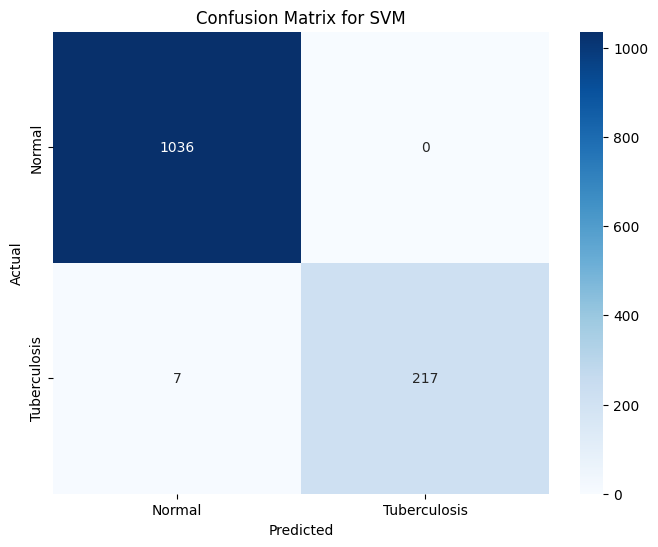

In [45]:
from sklearn.metrics import confusion_matrix

conf_matrix_svm = confusion_matrix(y_test, y_pred)

import matplotlib.pyplot as plt
import seaborn as sns

# Membuat heatmap dari matriks kebingungan
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, cmap='Blues', fmt='d', xticklabels=["Normal", "Tuberculosis"], yticklabels=["Normal", "Tuberculosis"])
plt.title('Confusion Matrix for SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
